# Demo Notebook for pyNmie

In [1]:
# Import modules
import numpy as np
from riinfo import riinfo_import as rii
from riinfo import riinfo_util as rii_util
import NMie
import matplotlib.pyplot as plt

In [2]:
# Define Wavelength range for calculation
wl_sh = 300
wl_lo = 900
nums = 101
wavelength = np.linspace(wl_sh,wl_lo,nums)

Define the core-shell particle

50nm Ag Core with 25nm Au shell immersed in water

In [3]:
dAg = 50 # Diameter of Ag core
dAu = 25 # Thickness of Au shell

# Load refractive indices from refractiveindex.info
# see https://github.com/steinhb/riinfo_import
# for more information
ridb = rii.riinfo()
ridatAg = ridb.load_material('main/Ag/Johnson.yml')
ridatAu = ridb.load_material('main/Au/Johnson.yml')

ridatAg[:,0]*=1e3   # Data from refractive index.info is in µm
ridatAu[:,0]*=1e3   # convert to nm

Interpolate the refractive index data to the pre-defined wavelength points


In [4]:
nAg_real = rii_util.spline_interpolate(wavelength, ridatAg[:,0], ridatAg[:,1])
nAg_imag = rii_util.spline_interpolate(wavelength, ridatAg[:,0], ridatAg[:,2])
nAg = nAg_real + 1j*nAg_imag

nAu_real = rii_util.spline_interpolate(wavelength, ridatAu[:,0], ridatAu[:,1])
nAu_imag = rii_util.spline_interpolate(wavelength, ridatAu[:,0], ridatAu[:,2])
nAu = nAu_real + 1j*nAu_imag

nH2O = 1.33 * np.ones(np.shape(wavelength))

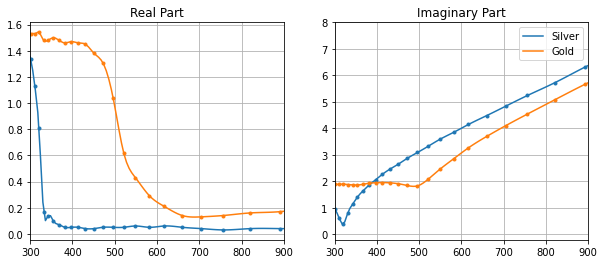

In [5]:
nrows = 1
ncols = 2
width = 5
height = 4

fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (width * ncols,height * nrows))
ax = axs[0]
ax.plot(wavelength, np.real(nAg), color = 'C0', label = 'Silver')
ax.plot(ridatAg[:,0], ridatAg[:,1], color = 'C0', marker = '.', linewidth = 0)
ax.plot(wavelength, np.real(nAu), color = 'C1')
ax.plot(ridatAg[:,0], ridatAu[:,1], color = 'C1', marker = '.', linewidth = 0)
ax.set_xlim(wl_sh, wl_lo)
ax.set_title('Real Part')
ax.grid()
ax = axs[1]
ax.plot(wavelength, np.imag(nAg), color = 'C0', label = 'Silver')
ax.plot(ridatAg[:,0], ridatAg[:,2], color = 'C0', marker = '.', linewidth = 0)
ax.plot(wavelength, np.imag(nAu), color = 'C1', label = 'Gold')
ax.plot(ridatAg[:,0], ridatAu[:,2], color = 'C1', marker = '.', linewidth = 0)
ax.set_xlim(wl_sh, wl_lo)
ax.set_ylim(-0.2,8)
ax.set_title('Imaginary Part')
ax.grid()
ax.legend()

Pack the diameters and refractive indices

diameter tuple has 1(core) + NUMBER_OF_SHELLS elements

d = (d_core, d_shell1, d_shell2, ..., d_shellN)

Refractive index tuple 1(core) + NUMBER_OF_SHELLS + 1(ambient) elements

n = (n_core, n_shell1, n_shell2, ..., n_shellN, n_ambient)

In [43]:
dias = (dAg,dAu)
n = (nAg, nAu, nH2O)

Define the particle as NMie class with the necessary inputs and calculate the crosssections

In [44]:
particle = NMie.NMie(diameters = dias, refind = n, wl = wavelength)
particle.calculate_crosssections()

The class elements NMie.qsca, NMie.qabs and NMie.qext hold the scattering, absorption and extinction cross sections

Furthermore, the electric and magnetic contributions to the respective cross sections can be accessed.
The arrays:
- NMie.qsca_el, NMie.qabs_el, NMie.qext_el
- NMie.qsca_ma, NMie.qabs_ma and NMie.qext_ma
hold the electric and magnetic modes.

e.g. the electric dipole and quadropole modes of the scattering cross section can be accesses by
- electric_dipole_mode = NMie.qsca_el[:,1]
- electric_quadrupole_mode = NMie.qsca_el[:,3]

The same holds for the magnetic modes and the other cross sections

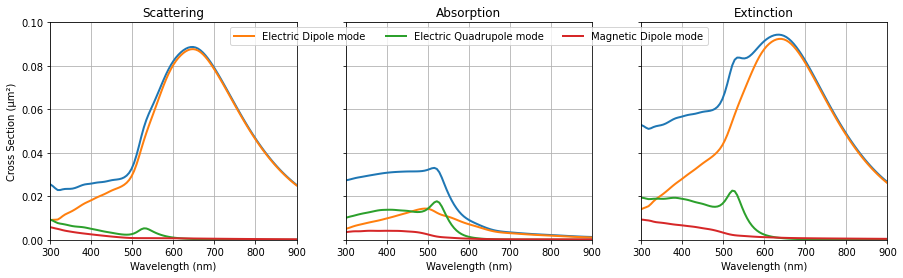

In [45]:
nrows = 1
ncols = 3
width =5
height = 4

fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (width * ncols,height * nrows),
                        sharey = True)
ax = axs[0]
ax.plot(wavelength, particle.qsca*1e-6, color = 'C0', linewidth = 2)
ax.plot(wavelength, particle.qsca_el[:,1]*1e-6, color = 'C1', label = 'Electric Dipole mode', linewidth = 2)
ax.plot(wavelength, particle.qsca_el[:,2]*1e-6, color = 'C2', label = 'Electric Quadrupole mode', linewidth = 2)
ax.plot(wavelength, particle.qsca_ma[:,1]*1e-6, color = 'C3', label = 'Magnetic Dipole mode', linewidth = 2)
ax.set_xlim(wl_sh, wl_lo)
ax.set_ylim(0,0.10)
ax.set_title('Scattering')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Cross Section (µm²)')
ax.grid()
ax = axs[1]
ax.plot(wavelength, particle.qabs*1e-6, color = 'C0', linewidth = 2)
ax.plot(wavelength, particle.qabs_el[:,1]*1e-6, color = 'C1', label = 'Electric Dipole mode', linewidth = 2)
ax.plot(wavelength, particle.qabs_el[:,2]*1e-6, color = 'C2', label = 'Electric Quadrupole mode', linewidth = 2)
ax.plot(wavelength, particle.qabs_ma[:,1]*1e-6, color = 'C3', label = 'Magnetic Dipole mode', linewidth = 2)
ax.set_xlim(wl_sh, wl_lo)
ax.set_ylim(0,0.10)
ax.set_title('Absorption')
ax.set_xlabel('Wavelength (nm)')
# ax.set_ylabel('Cross Section (µm²)')
ax.grid()

ax = axs[2]
ax.plot(wavelength, particle.qext*1e-6, color = 'C0', linewidth = 2)
ax.plot(wavelength, particle.qext_el[:,1]*1e-6, color = 'C1', label = 'Electric Dipole mode', linewidth = 2)
ax.plot(wavelength, particle.qext_el[:,2]*1e-6, color = 'C2', label = 'Electric Quadrupole mode', linewidth = 2)
ax.plot(wavelength, particle.qext_ma[:,1]*1e-6, color = 'C3', label = 'Magnetic Dipole mode', linewidth = 2)
ax.set_xlim(wl_sh, wl_lo)
ax.set_ylim(0,0.10)
ax.set_title('Extinction')
ax.set_xlabel('Wavelength (nm)')
# ax.set_ylabel('Cross Section (µm²)')
ax.grid()

legend = axs[1].legend(ncol = 3, loc = 'upper center', facecolor ='white')
axs[1].set_zorder(+1)